<a href="https://colab.research.google.com/github/kdemertzis/DUTh/blob/main/%CE%A4%CF%81%CE%AF%CE%B1_%CF%80%CE%B1%CF%81%CE%B1%CE%B4%CE%B5%CE%AF%CE%B3%CE%BC%CE%B1%CF%84%CE%B1_%CF%84%CE%B1%CE%BE%CE%B9%CE%BD%CE%BF%CE%BC%CE%B7%CF%84%CF%8E%CE%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Αρχικά κάνουμε upgrade στις βιβλοθήκες που θα χρειαστούμε, αν δεν το έχουμε ήδη κάνει. 

In [1]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install --upgrade matplotlib # Κάνουμε update την matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 8.0 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 82.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's d

## Εισαγωγή dataset και διαχωρισμός σε train και test set

Εισάγουμε το [Breast Cancer Wisconsin Diagnostic Database](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). Το dataset περιλαμβάνει διάφορες πληροφορίες για όγκους σχετιζόμενους με τον καρκίνο του στήθους καθώς και ετικέτες για κάθε δείγμα (sample), αν το δείγμα αντιστοιχεί σε καλοήθη όγκο ή κακοήθη. Το σύνολο δεδομένων έχει 569 δείγματα για αντίστοιχους όγκους και περιλαμβάνει 30 χαρακτηριστικά (attributes) για κάθε δείγμα, όπως ακτίνα του όγκου, υφή, ομοιομορφία και περιοχή. Θα χρησιμοποιήσουμε αυτό το dataset και τα χαρακτηριστικά για να προβλέψουμε αν ένας όγκος είναι κακοήθης ή όχι.

In [1]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

from sklearn.model_selection import train_test_split

# Split our data
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.33)

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Παραγωγικοί ταξινομητές



## Naive Bayes Classifier (κατηγορικές μεταβλητές)


![$P(A\mid B)={\frac {P(B\mid A)\,P(A)}{P(B)}}$](https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Bayes%27_Theorem_MMB_01.jpg/220px-Bayes%27_Theorem_MMB_01.jpg "A blue neon sign, showing the simple statement of Bayes’ theorem")

H βασική ιδέα λειτουργίας του ταξινομητή είναι α) ο γνωστός νόμος του Bayes $$P(A\mid B)={\frac {P(B\mid A)\,P(A)}{P(B)}}$$

και β) η (naive) υπόθεση ότι τα χαρακτηριστικά είναι όλα ανεξάρτητα μεταξύ τους (δεν ισχύει γενικά, αλλά ο ταξινομητής είναι πρακτικά καλός σε πολλές περιπτώσεις). Παράδειγμα: θα βρέξει σήμερα? Naive Bayes: "Θα το προβλέψω με βάση το παρελθόν θεωρώντας ότι τα χαρακτηριστικά θερμοκρασία, νεφοκάλυψη και ατμοσφαιρική πίεση είναι όλα ανεξάρτητα μεταξύ τους".

Με δεδομένα μια μεταβλητή κατηγορίας (κλάσης) $y$ και ένα εξαρτώμενο διάνυσμα χαρακτηριστικών $x_1$ μέχρι $x_n$, σύμφωνα με το θεώρημα του Bayes θα ισχύει 
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}{P(x_1, \dots, x_n)}$$
Ισχύει ότι $P(x_1, \dots, x_i, \dots, x_n \mid y) =  \prod_{i=1}^{n} P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n)$ και κάνουμε την αφελή υπόθεση ότι το χαρακτηριστικό $x_i$ για κάθε $i$ εξαρτάται μόνο από την κλάση $y$ και όχι από οποιοδήποτε άλλο χαρακτηριστικό
$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y)$$
αυτό οδηγεί στην απλοποίηση
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}{P(x_1, \dots, x_n)}$$
Με δεδομένη είσοδο, το $P(x_1, \dots, x_n)$ είναι σταθερό. Συνεπώς μπορούμε να χρησιμοποιήσουμε τον ακόλουθο κανόνα ταξινόμησης $$P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$
$$\Downarrow$$
$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)$$
Το $P(y)$ είναι η υπόθεσή μας και ισούται με τη σχετική συχνότητα της κλάσης $y$ στο training set. To $P(x_i \mid y)$ είναι η πιθανοφάνεια δηλαδή η πιθανότητα του δείγματος με δεδομένη την υπόθεσή μας και μπορεί επίσης να υπολογιστεί απλά από το training set. Οι διάφοροι Naive Bayes classifiers διαφοροποιούνται κυρίως από τις υποθέσεις που κάνουν ως προς την κατανομή $P(x_i \mid y)$. Η κλάση $\hat{y}$ που ανατίθεται σε ένα νέο δείγμα είναι αυτή που μεγιστοποιεί το δεξί μέλος της σχέσης.

### Ένα παράδειγμα

Έστω ότι για 14 μέρες παρατηρήσαμε 4 μεταβλητές του καιρού (νεφοκάλυψη, θερμοκρασία, υγρασία και άνεμο) και το αν τελικά παίξαμε τέννις. Τα χαρακτηριστικά μας είναι κατηγορικά, παίρνουν δηλαδή διακριτές τιμές από ενα ορισμένο σύνολο τιμών.

| Day | Outlook  | Temperature | Humidity | Wind   | Play Tennis? |
|-----|----------|-------------|----------|--------|--------------|
| 1   | Sunny    | Hot         | High     | Weak   | No           |
| 2   | Sunny    | Hot         | High     | Strong | No           |
| 3   | Overcast | Hot         | High     | Weak   | Yes          |
| 4   | Rain     | Mild        | High     | Weak   | Yes          |
| 5   | Rain     | Cool        | Normal   | Weak   | Yes          |
| 6   | Rain     | Cool        | Normal   | Strong | No           |
| 7   | Overcast | Cool        | Normal   | Strong | Yes          |
| 8   | Sunny    | Mild        | High     | Weak   | No           |
| 9   | Sunny    | Cool        | Normal   | Weak   | Yes          |
| 10  | Rain     | Mild        | Normal   | Weak   | Yes          |
| 11  | Sunny    | Mild        | Normal   | Strong | Yes          |
| 12  | Overcast | Mild        | High     | Strong | Yes          |
| 13  | Overcast | Hot         | Normal   | Weak   | Yes          |
| 14  | Rain     | Mild        | High     | Strong | No           |

Το πρώτο βήμα είναι να γράψουμε 4 πίνακες αναφοράς ("look-up tables"), έναν για κάθε χαρακτηριστικό,  με την πιθανότητα να παιχτεί ή να μην παιχτεί τέννις σε σχέση με το χαρακτηριστικό. Έχουμε συνολικά 5 περιπτώσεις που δεν μπορέσαμε να παίξουμε και 9 που μπορέσαμε. Οι 4 πίνακες είναι οι ακόλουθοι:

| OUTLOOK  | Play = Yes | Play = No | Total |	| TEMPERATURE | Play = Yes | Play = No | Total |	| HUMIDITY | Play = Yes | Play = No | Total |	| WIND   | Play = Yes | Play = No | Total |
|----------|------------|-----------|-------|	|-------------|------------|-----------|-------|	|----------|------------|-----------|-------|	|--------|------------|-----------|-------|
| Sunny    | 2/9        | 3/5       | 5/14  |	| Hot         | 2/9        | 2/5       | 4/14  |	| High     | 3/9        | 4/5       | 7/14  |	| Strong | 3/9        | 3/5       | 6/14  |
| Overcast | 4/9        | 0/5       | 4/14  |	| Mild        | 4/9        | 2/5       | 6/14  |	| Normal   | 6/9        | 1/5       | 7/14  |	| Weak   | 6/9        | 2/5       | 8/14  |
| Rain     | 3/9        | 2/5       | 5/14  |	| Cool        | 3/9        | 1/5       | 4/14  |	| Cool     | 3/9        | 1/5       | 4/14  |	| Cool   | 3/9        | 1/5       | 4/14  |
και τέλος υπολογίζουμε την πιθανότητα να παίξουμε και να μην παίξουμε:

P(Play=Yes) = 9/14

P(Play=No) = 5/14

#### Inference

Έστω ένα νέο δείγμα X = (Outlook=Sunny, Temperature=Cool, Humidity=High, Wind=Strong). Σε ποια κατηγορία ανήκει; (θα παίξουμε τέννις ή όχι).

Υπολογίζουμε πρώτα από τους πίνακες αναφοράς την "πιθανότητα" να παίξουμε

* P(Outlook=Sunny | Play=Yes) = 2/9
* P(Temperature=Cool | Play=Yes) = 3/9
* P(Humidity=High | Play=Yes) = 3/9
* P(Wind=Strong | Play=Yes) = 3/9
* P(Play=Yes) = 9/14

Σύμφωνα με τον κανόνα ταξινόμησης του NB η πιθανότητα να παίξουμε είναι ανάλογη του γινομένου των προηγούμενων 

P(X|Play=Yes)P(Play=Yes) = (2/9) \* (3/9) \* (3/9) \* (3/9) \* (9/14) = 0.0053

Υπολογίζουμε παρόμοια την "πιθανότητα" να μην παίξουμε

* P(Outlook=Sunny | Play=No) = 3/5
* P(Temperature=Cool | Play=No) = 1/5
* P(Humidity=High | Play=No) = 4/5
* P(Wind=Strong | Play=No) = 3/5
* P(Play=No) = 5/14

P(X|Play=No)P(Play=No) = (3/5) \* (1/5) \* (4/5) \* (3/5) \* (5/14) = 0.0206

Επειδή η ποσότητα 0.0206 είναι μεγαλύτερη από την 0.0053, η απόφαση του Naive Bayes είναι να μην παίξουμε τέννις. Οι ποσότητες αυτές (του αριθμητή) μας αρκούν για την απόφαση γιατί ο παρονομαστής είναι σταθερός. Για να πάρουμε τις πλήρεις πιθανότητες για το συγκεκριμένο δείγμα Χ υπολογίζουμε και τον παρονομαστή:

* P(X) = P(Outlook=Sunny) \* P(Temperature=Cool) \* P(Humidity=High) \* P(Wind=Strong)
* P(X) = (5/14) \* (4/14) \* (7/14) \* (6/14)
* P(X) = 0.02186

* P(Play=Yes | X) = 0.0053/0.02186 = 0.2424
* P(Play=No | X) = 0.0206/0.02186 = 0.9421

## Gaussian Naive Bayes (συνεχείς μεταβλητές)

Θέλουμε να δοκιμάσουμε τον Naive Bayes στο Wisconsin. Εδώ όμως έχουμε συνεχείς μεταβλητές. Όπως είπαμε θα πρέπει να κάνουμε μια υπόθεση για την κατανομή $P(x_i \mid y)$. Θα θεωρήσουμε ότι η κατανομή κάθε χαρακτηριστικού ως προς κάθε κλάση ακολουθεί την κανονική κατανομή:
$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$
Ο συγκεκριμένος ταξινομητής είναι ο Gaussian Naive Bayes. Πρακτικά, με τα δεδομένα του training set, για κάθε κλάση υπολογίζουμε τη μέση τιμή $\mu_y$ και τη διακύμανση $\sigma^2_y$ κάθε χαρακτηριστικού για τη συγκεκριμένη κλάση. 

Ας δοκιμάσουμε τον Gaussian Naive Bayes στο Wisconsin:

In [2]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# κάνουμε εκπαίδευση (fit) δηλαδή ουσιαστικά υπολογίζουμε μέση τιμή και διακύμανση για όλα τα χαρακτηριστικά και κλάσεις στο training set
model = gnb.fit(train, train_labels)
# η GaussianNB έχει builtin μέθοδο υπολογισμό accuracy.
gnb.score(test, test_labels)

0.9521276595744681

# Παραμετρικοί και μη-παραμετρικοί ταξινομητές, bias - variance trade-off
O Gaussian Naive Bayes είναι ένας παραμετρικός ταξινομητής. Οι παραμετρικοί ταξινομητές κάνουν κάποια υπόθεση για την κατανομή (των χαρακτηριστικών) των δεδομένων και την προσδιορίζουν μέσω παραμέτρων. Στην περίπτωση του Gaussian Naive Bayes, η υπόθεση είναι η κανονική κατανομή και οι παράμετροι είναι τα $μ$ και $σ^2$ των χαρακτηριστικών. Αντίθετα, οι μη-παραμετρικές μέθοδοι δεν κάνουν καμμία υπόθεση για την κατανομή των δεδομένων. Προσοχή: και οι μη-παραμετρικοί ταξινομητές έχουν παραμέτρους (και πάρα πολλές σε ορισμένες περιπτώσεις, τα βάρη των νευρωνικών για παράδειγμα) που επηρρεάζουν τη λειτουργία τους αλλά δεν σχετίζονται με κάποια υπόθεση κατανομής για τα δεδομένα. 

Σε γενικές γραμμές οι παραμετρικοί ταξινομητές είναι απλούστεροι, ταχύτεροι στις φάσεις train/test και χρειάζονται λιγότερα δεδομένα εκπαίδευσης. Από την άλλη, έχουν γενικά μικρότερη χωρητικότητα (capacity), δηλαδή μπορούν να διαχωρίσουν τις κλάσεις σε προβλήματα σχετικά μικρότερων διαστάσεων ενώ η απαίτηση τα πραγματικά δεδομένα να ακολουθούν μια ακριβή κατανομή είναι πολύ ισχυρή και δεν επαληθεύεται πρακτικά. Αντιστρόφως, οι μη παραμετρικοί ταξινομητές είναι πιο αργοί στην εκπαίδευση, έχουν γενικά μεγαλύτερες απαιτήσεις χώρου/μνήμης και χρειάζονται περισσότερα δεδομένα αλλά έχουν μεγαλύτερη χωρητικότητα, μπορούν να μάθουν δυσκολότερα προβλήματα και να έχουν καλύτερη απόδοση σε μεγαλύτερα datasets. 

Οι μη παραμετρικοί ταξινομητές μπορούν να εμφανίσουν επίσης εντονότερα το πρόβλημα της υπερεκπαίδευσης (overfitting), δηλαδή να προσαρμοστούν υπερβολικά στα δεδομένα εκπαίδευσης και να μειωθεί η ικανότητα γενίκευσης (generalisation) τους σε νέα δείγματα. Γενικά στη φάση της εκπαίδευσης προσπαθούμε να επιτύχουμε μια καλή ισορροπία μεταξυ της απόκλισης (bias) και της διακύμανσης (variance) από τις πραγματικές τιμές.

![Bias-Variance trade off](http://www.bogotobogo.com/python/scikit-learn/images/NeuralNetwork7-Overfitting/Overfitting.png "Bias-Variance trade off")


Ένα παράδειγμα μη-παραμετρικού ταξινομητή που θα εξετάσουμε είναι ο kNN (k-Nearest-Neighbours). 


# Διακριτικοί ταξινομητές

### k Nearest Neighbors Classifier (kNN)
O kNN είναι ένας μη παραμετρικός ταξινομητής βασισμένος σε παραδείγματα (instance-based). Η αρχή λειτουργίας του είναι πολύ απλή. Για ένα νέο δείγμα προς ταξινόμηση, πρώτα υπολογίζουμε τους k πλησιέστερους γείτονές του (στον ν-διάστατο χώρο των χαρακτηριστικών εισόδου) με βάση κάποια συνάρτηση απόστασης, συνήθως ευκλείδεια
$$d(x, x') = \sqrt{\left(x_1 - x'_1 \right)^2 + \left(x_2 - x'_2 \right)^2 + \dotsc + \left(x_n - x'_n \right)^2}$$
Η κλάση του νέου δείγματος θα είναι η κλάση της πλειοψηφίας των k γειτόνων (διαλέγουμε k περιττό γενικά), είτε απλά υπολογισμένη (άθροισμα) είτε (αντίστροφα) ζυγισμένη με βάση την απόσταση του κάθε γείτονα. 

Ο kNN δεν έχει πρακτικά φάση εκπαίδευσης. Ωστόσο, για να ταξινομήσουμε ένα νέο δείγμα στην φάση test,  πρέπει να συγκρίνουμε την απόστασή του με κάθε δείγμα του train set. Αυτό σημαίνει ότι για την ταξινόμηση είναι απαραίτητα όλα τα δείγματα εκπαίδευσης (εξού και η ονομασία "instance-based", ενώ στον Naive Bayes χρειαζόμαστε μόνο τις παραμέτρους $μ$ και $σ^2$). Αυτό σημαίνει ότι ο kNN είναι πιο απαιτητικός και σε χώρο (αποθήκευση όλων των δειγμάτων) και σε χρόνο (υπολογισμός όλων των αποστάσεων για κάθε νέο δείγμα).


## Υπερπαράμετρος k
Το k της γειτονιάς του kNN είναι μια υπερπαράμετρος του ταξινομητή. Μια άλλη υπερπαράμετρος για παράδειγμα είναι η συνάρτηση της απόστασης. Οι υπερπαράμετροι είναι επιλογές που γίνονται από τον σχεδιαστή του συστήματος και δεν μπορούμε να ξέρουμε τις βέλτιστες τιμές τους αν πρώτα δεν τις αξιολογήσουμε εμπειρικά σε δεδομένα.  Ένα άλλο παράδειγμα υπερπαραμέτρου είναι ο αριθμός των κρυφών νευρώνων σε ένα MLP. Στην περίπτωση του kNN το k ελέγχει το trade-off μεταξύ μεταξύ απόκλισης και διακύμνανσης.

Έαν θέσουμε μικρό k, πχ k=1 παίρνουμε ένα ταξινομητή με υψηλή διακύμανση και χαμηλή αποκληση. Ο ταξινομητής τείνει να αγνοεί τη συνολική κατανομή και αποφασίζει μόνο από το κοντινότερο δείγμα. Στην περίπτωση k=1 το σύνορο απόφασης (decision boundary) περνά από τις μεσοκάθετους γειτονικών δειγμάτων διαφορετικής κλάσης. 

![kNN k=1](https://i.stack.imgur.com/UG81y.png "kNN with k=1")

Αν διαλέξουμε μεγαλύτερο k, φτιάχνουμε ένα ταξινομητή με χαμηλότερη διακύμανση και υψηλότερη απόκλιση. Θα ταξινομίσει λάθος περισσότερα αποκλίνοντα δείγματα (outliers) αλλά θα σέβεται περισσότερο τη συνολική κατανομή.

![kNN k=20](https://i.stack.imgur.com/FZITG.png "kNN with k=20")

Ο kNN ανήκει στην οικογένεια των **ταξινομητών βασισμένων σε στιγμιότυπα (instance based classifiers).**



## Το Iris dataset
Για να μελετήσουμε τον kNN, θα φορτώσουμε το dataset ["Iris"](https://archive.ics.uci.edu/ml/datasets/Iris). Το Iris είναι το διασημότερο dataset στο Machine Learning. Το χρησιμοποίησε πρώτος το 1936 ο διάσημος στατιστικός [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) και αποτελείται από 50 παρατηρήσεις για κάθε είδος του άνθους Iris (Iris setosa, Iris virginica και Iris versicolor). Για κάθε δείγμα μετρήθκαν 4 χαρακτηριστικά: το πλάτος και το μήκος των πετάλων και των σεπάλων.

![Iris petals & sepals](https://www.integratedots.com/wp-content/uploads/2019/06/iris_petal-sepal-e1560211020463.png "Iris petals & sepals")

Σημειώστε ότι με το Iris και τρεις κατηγορίες και άρα έχουμε multiclass και όχι binary classification. Εισάγουμε το Iris στο notebook.

In [3]:
# Load Iris and organize our data
from sklearn.datasets import load_iris
data = load_iris()
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

In [4]:
# Ας τυπώσουμε τα ονόματα των χαρκτηριστικών
print(feature_names)
print(label_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [5]:
# Χρησιμοποιούμε τη γνωστή train_test_split για να διαχωρίσουμε σε train και test set
# το (int) όρισμα "random_state" είναι το seed της γεννήτριας τυχαίων αριθμών
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.40, random_state=78)

Διαλέγουμε τυχαία τιμή 5 για την υπερπαράμετρο k, εκπαιδεύουμε ένα kNN classifier και υπολογίζουμε την πιστότητα του στο Iris, στο προηγούμενο train/test split

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(accuracy_score(y_test, pred))

0.9833333333333333


## Ρύθμιση υπερπαραμέτρων με διασταυρούμενη επικύρωση (Cross Validation)
Ένας προφανής τρόπος να βρούμε τη βέλτιστη τιμή του k, να πραγματοποιήσουμε δηλαδή επικύρωση του μοντέλου, είναι ο ακόλουθος. Για k=1 μέχρι k=κάποιο n, κάνουμε fit τον ταξινομητή στο train set και μετράμε την απόδοση στο test set. Ο ταξινομητής με k που δίνει το μικρότερο σφάλμα ταξιμόνόμησης σύμφωνα με κάποιο κριτήριο (εδώ η πιστότητα) στο test set θα είναι ο βέλτιστος. Όμως, αν ακολουθήσουμε αυτή τη στρατηγική, ουσιαστικά κάνουμε υπερεκπαίδευση, καθώς χρησιμοποιούμε το test set ως training set, δηλαδή βελτιστοποιούμε κάποιο κριτήριο σφάλματος πάνω στο test set. Αυτό μπορεί να είναι επιβλαβές για την ικανότητα γενίκευσης του ταξινομητή: το test set χρησιμεύει μόνο για την τελική εκτίμηση της απόδοσης του ταξινομητή.

Για να ακολουθήσουμε σωστά το πρωτόκολλο, αυτό που πρέπει να κάνουμε είναι να χρησιμοποιήσουμε μόνο το πραγματικό training set για να διαλέξουμε τις βέλτιστες υπερπαραμέτρους. Θα μπορούσαμε να κρατήσουμε ένα ποσοστό δειγμάτων ως σύνολο επικύρωσης (validation set πχ άλλο ένα 1/3) του training set και να ακολουθήσουμε την προηγούμενη διαδικασία: εκπαίδευση στο 1/3 training set, επικύρωση σε 1/3 και τελικά αξιολόγηση στο 1/3 data set. Ωστόσο αυτή η μεθοδολογία "αχρηστεύει" μεγάλο μέρος του dataset (τα 2/3) ως προς την εκπαίδευση του ταξινομητή. Πρακτικά λοιπόν, προτιμούμε να χρησιμοποιούμε τη μέθοδο της διασταυρούμενης επικύρωσης (Cross Validation).

Στο Cross Validation αρχικά χωρίζουμε το training set σε έναν αριθμό "πτυχών" (folds). Συνηθισμένες τιμές είναι το 5 και το 10 (5-fold και 10-fold CV). Στη συνέχεια, για κάθε k-fold (άσχετο από το k του kNN), θεωρούμε ότι τα k μείον 1 folds είναι training set και ότι το fold που αφήσαμε έξω είναι το test set. Υπολογίζουμε τη μετρική σφάλματός μας στο test set που ορίζει το fold. Επαναλαμβάνουμε τη διαδικασία για τα k folds για κάθε τιμή των υπερπαραμέτρων και υπολογίζουμε τη μέση τιμή της μετρικής του σφάλματος. Με αυτό τον τρόπο, αφενός είμαστε αμερόληπτοι στην αξιολόγηση αφήνοντας τελείως έξω το test set και αφετέρου χρησιμοποιούμε αποτελεσματικά τα δεδομένα εκπαίδευσης: τα χρησιμοποιούμε όλα και παίρνοντας τη μέση τιμή εξαλείφουμε πιθανές ανωμαλίες στα δεδομένα.

![Cross validation](https://sebastianraschka.com/images/faq/evaluate-a-model/k-fold.png "Cross Validation")

To Scikit Learn έχει συναρτήσεις για να κάνει αυτόματα cross validation (να ορίζει folds και να  υπολογίζει τιμές και μέσους όρους). Θα κάνουμε 5 fold cross validation για να υπολογίσουμε το βέλτιστο k του kNN στο Iris.

# Ταξινομητές βασισμένοι στην παλινδόρμηση: Λογιστική Παλινδρόμηση (Logistic Regression)

Παρόμοια με τον Αφελή Μπεϋζιανό, θα φτιάξουμε έναν ταξινομητή βασισμένο στη Λογιστική Παλινδόμηση from scratch, προτού χρησιμοποιήσουμε την έτοιμη συνάρτηση του scikit. Ξεκινάμε, όπως είναι αναμενόμενο για αυτό το παράδειγμα ταξινομητών, από την γραμμική παλινδόμηση.

## Γραμμική παλινδρόμηση

Η συνάρτηση της ευθείας είναι $y=mx+b$, όπου $m$ η κλίση της ευθείας και $b$ το σημείο τομής του άξονα $Y$. Στην περίπτωση όπου τα δεδομένα έχουν μία διάσταση (scalar), η διαχωριστική επιφάνεια (*η υπόθεση*) του ταξινομητή είναι μια απλή ευθεία, σύμφωνα με τον προηγούμενο τύπο. Η εύρεση των *εμπειρικών* $\hat{m}$ και $\hat{b}$ γίνεται με τη μέθοδο των ελαχίστων τετραγώνων.

### Μέθοδος των Ελάχιστων Τετραγώνων
Με τη Μέθοδο των Ελαχίστων Τετραγώνων προσπαθούμε να βρούμε μια ευθεία για την οποία η απόσταση κάθε σημείου $\{x_i, y_i\}$ είναι η ελάχιστη. Δήλαδή θέλουμε να βρούμε $$\min_{a,m}Q(a,m) \mbox{ όπου } Q(b,m) = \sum_{i=1}^n\hat{\varepsilon}_i^{\,2} = \sum_{i=1}^n (y_i - b - m x_i)^2\ $$

Χρησιμοποιώντας απειροστικό λογισμό, την γεωμετρία του εσωτερικού γινόμενου ή απλά αναπτύσσοντας την συνάρτηση μπορεί να δειχθεί ότι οι τιμές $ b $ και $ m $ οι οποίες ελαχιστοποιούν την συνάρτηση $Q(b,m)$ είναι:
$$ \begin{align} \hat{m} & = \frac{ \sum_{i=1}^{n} (x_{i}-\bar{x})(y_{i}-\bar{y}) }{ \sum_{i=1}^{n} (x_{i}-\bar{x})^2 }
  = \frac{ \sum_{i=1}^{n}{x_{i}y_{i}} - \frac1n \sum_{i=1}^{n}{x_{i}}\sum_{j=1}^{n}{y_{j}}}{ \sum_{i=1}^{n}({x_{i}^2}) - \frac1n (\sum_{i=1}^{n}{x_{i}})^2 } =\\  &= \frac{ \overline{xy} - \bar{x}\bar{y} }{ \overline{x^2} - \bar{x}^2 } =   \frac{ \operatorname{Cov}[x,y] }{ \operatorname{Var}[x] } = r_{xy} \frac{s_y}{s_x},\\ \hat{b}  & = \bar{y} - \hat{m}\,\bar{x}\end{align}$$

όπου $r_{xy}$ είναι μια παράμετρος συσχέτισης μεταξύ $x$ και $y$, $s_x$ είναι η τυπική απόκλιση του $x$, και $s_y$ είναι αντίστοιχα η τυπική απόκλιση του $y$. Η οριζόντια γραμμή πάνω από μια μεταβλητή δηλώνει τον απλό μέσο όρο της μεταβλητής. Για παράδειγμα: $\overline{xy} = \tfrac{1}{n}\textstyle\sum_{i=1}^n x_iy_i.$ Τα "b καπέλο" $\hat{b}$ και "m καπέλο" $\hat{m}$ ονομάζονται εκτιμήτριες ελάχιστων τετραγώνων.
Αντικαθιστώντας τις παραπάνω μαθηματικές εκφράσεις για τις παραμέτρους $\hat{b}$ και $\hat{m}$ στο $ y = \hat{b} + \hat{m} x, \,$ πέρνουμε

$\frac{ y-\bar{y}}{s_y} = r_{xy} \frac{ x-\bar{x}}{s_x}  $

Αυτό δείχνει ότι το $r_{xy}$ έχει το ρόλο της γραμμής παλινδρόμησης για τα σημεία. Η συνάρτηση $ y = \hat{b} + \hat{m} x, $ λέγεται ευθεία ελαχίστων τετραγώνων ή ευθεία παλινδρόμησης. 

Στη μηχανική μάθηση η συνάρτηση αυτή λέγεται συνάρτηση υπόθεσης ή απλά *υπόθεση* και συμβολίζεται ως $ h_\theta(x) = \theta_0 + \theta_1x$ (το $\hat{b}$ και $\hat{m}$ είναι οι παράμετροι $\theta_0$ και $\theta_1$ αντίστοιχα).


### Πολλαπλή γραμμική παλινδρόμηση

Σε περίπτωση που έχουμε δεδομένα που βρίσκονται εντός ενός πολυδιάστατου χώρου, κάτι σύνηθες σε προβλήματα μηχανικής μάθησης, η ευθεία γενικεύεται (για *διανύσματα* εισόδου πλέον) σε $$y= β_1 ​ x_1 ​+...+β_nx_n ​ +b,$$ και μιλάμε πλέον για το πρόβλημα της πολλαπλής γραμμικής παλινδρόμησης όπου αναζητούμε τις τιμές $β$ (διάνυσμα) και b που ορίζουν το υπερεπίπεδο που έχει τη βέλτιστη προσαρμογή στα δεδομένα. 

Σημειώστε ότι το $y$ παραμένει ένας βαθμωτός αριθμος o οποίος στη γενική περίπτωση μπορεί να πάρει οποιαδήποτε τιμή.

## Από τη γραμμική στη λογιστική παλινδρόμηση

Σε περίπτωση που θα θέλαμε να μετατρέψουμε το πρόβλημα της παλινδρόμησης σε ένα πρόλβημα δυαδικής ταξινόμησης μια προσέγγιση θα ήταν να κοιτάξουμε το πεδίο τιμών της $y$ και να θέσουμε μια τιμή κατωφλιού $y_{thresh}$ για την οποία θα ισχύει $$\begin{align} y_{i} &=1 \text{, αν } y_i \geq y_{thresh} \text{ και }\\
y_{i} &=0 \text{ αλλιώς} \end{align}
$$
Το πρόβλημα με αυτή την ευρετική μέθοδο είναι ότι ενώ πρακτικά πράγματι μετατρέπει το πρόβλημα παλινδρόμησης σε δυαδική ταξινόμηση, δεν υπάρχει κάποια θεωρητική βάση για να υποστηρίξει την ορθότητα της απόφασης μας. Αυτή θα υπήρχε, αν με κάποιο τρόπο μπορούσαμε να λάβουμε μια συνάρτηση πυκνότητας πιθανότητας για τα $P(y_i)$ έτσι ώστε αν $P(y_i)\geq 0,5$ να έχουμε $y_{i} =1$

### Η λογιστική (σιγμοειδής) συνάρτηση
![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

Μια ιδιαίτερα βολική συνάρτηση για να λάβουμε τιμές στο διάσημα μεταξύ 0 και 1 είναι λογιστική σιγμοειδής συνάρτηση ή απλά λογιστική συνάρτηση:
$$ f(x)={\frac {1}{1+e^{-x}}} .$$ 
Ας την ορίσουμε:


In [7]:
import math

def sigmoid(x: float) -> float:
    return 1 / (1 + math.exp(-x))

assert sigmoid(0) == 0.5 
# Με την assert κάνουμε έλεγχο τιμών, μια καλή πρακτική 
# Αν δεν προκύπτει η ισότητα ο διερμηνευτής της Python θα πετάξει σφάλμα. 
# Αν είναι σωστή η τιμή η εκτέλεση θα συνεχιστεί χωρίς κάποια έξοδο.

### Δημιουργία μιας συνάρτησης καταστολής (squashing function)

Καταρχάς θα χρησιμοποιήσουμε ένα μικρό αλγεβρικό "τρικ" για να "ξεφορτωθούμε" τον όρο $b$ και να πάρουμε τη βολική μορφή του γινομένου. Θα προσθέσουμε στην αρχή του διανύσματος του $x$ έναν άσσο και στην αρχή του διανύσματος $β$ το $b$ ως εξής:
$$
\vec{x}=\left(\begin{array}{c}
1 \\
x_{1} \\
\cdots \\
x_{n}
\end{array}\right) \vec { β }=\left(\begin{array}{c}
b \\
\beta_{1} \\
\cdots \\
\beta_{n}
\end{array}\right)
$$

Συνεπώς τώρα μπορούμε να γράψουμε
$$y= β_1 ​ x_1 ​+...+β_nx_n ​ +b= b +β_1 ​ x_1 ​+...+β_nx_n ​ =\vec{x}\cdot \vec{β}$$
όπου "$\cdot$" είναι το εσωτερικό γινόμενο των δύο διανυσμάτων. Υλοποιούμε το εσωτερικό γινόμενο δύο διανυσμάτων:

In [8]:
from typing import List

def dot(a: List[float], b: List[float]) -> float:
    assert len(a) == len(b)
    return sum([a_i * b_i for a_i, b_i in zip(a, b)])

assert dot([1, 2, 3, 4], [5, 6, 7, 8]) == 70

Μπορούμε τώρα να γράψουμε τώρα τη δική μας συνάρτηση καταστολής `squash` η οποία εφαρμόζει τη σιγμοειδή συνάρτηση πάνω στο εσωτερικό γινόμενο δύο διανυσμάτων ή αλλιώς που υπολογίζει το 
$$ y= \sigma(β_1 ​ x_1 ​+...+β_nx_n ​ +b)$$ όπου $\sigma$ η σιγμοειδής:

In [9]:
def squash(beta: List[float], x: List[float]) -> float:
    assert len(beta) == len(x)
    # Calculate the dot product
    dot_result: float = dot(beta, x)
    # Use sigmoid to get a result between 0 and 1
    return sigmoid(dot_result)

assert squash([1, 2, 3, 4], [5, 6, 7, 8]) == 1.0

Έχουμε λοιπόν μετατρέψει το πρόβλημα παλινδρόμησης σε πρόβλημα δυαδικής ταξινόμησης. Το ζητούμενό μας τώρα είναι το εξής: εφόσον μιλάμε για ταξινόμηση, δηλαδή επιβλεπόμενη μάθηση, για κάθε $x_i$ θα μας δίνονται οι επιθυμητές ετικέτες 0 και 1 $y_i$ και εμείς θα πρέπει να προσδιορίσουμε τις βέλτιστες τιμές του $β$ ή αλλοιώς να προσδιορίσουμε την υπόθεση μας με όρους μηχανικής μάθησης.

### Συνάρτηση πυκνότητας πιθανότητας και συνάρτηση κόστους

Για να μπορέσουμε να προχωρήσουμε θα πρέπει να ορίσουμε μια συνάρτηση υπό συνθήκης πιθανότητας που θα εκφράζει κατά πόσο "πλησιάζουμε" στη σωστή ετικέτα $y_i$ για κάθε δείγμα $x_i$ και τα βάρη μας $β$. Αυτή η συνάρτηση θα πρέπει αν έχει πιθανότητα $\sigma(βx_i)$ για να είναι η ετικέτα "1" και $1-\sigma(βx_i)$ για να είναι η ετικέτα "0". Μπορούμε να το γράψουμε σε μία εξίσωση ως εξής:
$$
P\left(y_{i} \mid \beta x_{i}\right)=\sigma\left(\beta x_{i}\right)^{y_{i}} \times\left(1-\sigma\left(\beta x_{i}\right)\right)^{1-y_{i}}
$$
όπου ανάλογα αν $y_i=1$ ή $y_i=0$ μένει μόνο ο πρώτος ή ο δεύτερος όρος στη δεξιά πλευρά της εξίσωσης. Πρόκειται για τη συνάρτηση πιθανοφάνειας της υπόθεσής μας, η οποία επιθυμούμε να είναι η μέγιστη δυνατή.

Εφόσον μας δίνονται τα $x_i$ και $y_i$ και πρέπει να βρούμε τα βέλτιστα βάρη $β$ θα χρειαστούμε μια συνάρτηση σφάλματος ή απώλειας (loss) $L(β|y_ix_i)$ προς ελαχιστοποίηση. 
Αρχικά, θα πάρουμε τον λογάριθμο της πιθανοφάνειας, κάτι που κανουμε συχνά για υπολογιστικούς λόγους. Ο λογάριθμος έχει την ίδια μονοτονία με την αρχικη συνάρτηση αλλά μας δίνει αθροίσματα τιμών αντί για γινόμενα. Στη συνέχεια, εφόσον στοχεύουμε σε ελαχιστοποίηση, θα χρησιμοποιήσουμε την αρνητική συνάρτηση του λογάριθμου της log-πιθανοφάνειας. Τελικά προκύπτει:
$$
\log L\left(\beta \mid x_{i} y_{i}\right)=-\left(y_{i} \log \left(\sigma\left(\beta x_{i}\right)\right)+\left(1-y_{i}\right) \log \left(1-\sigma\left(\beta x_{i}\right)\right)\right)
$$
που είναι η συνάρτηση λογαριθμικού σφάλματος ή απώλειας (Log Loss / Log Likelihood) προς ελαχιστοποίηση. Την ορίζουμε:


In [10]:
def neg_log_likelihood(y: float, y_pred: float) -> float:
    return -((y * math.log(y_pred)) + ((1 - y) * math.log(1 - y_pred)))

assert 2.30 < neg_log_likelihood(1, 0.1) < 2.31
assert 2.30 < neg_log_likelihood(0, 0.9) < 2.31
assert 0.10 < neg_log_likelihood(1, 0.9) < 0.11
assert 0.10 < neg_log_likelihood(0, 0.1) < 0.11

### Συνάρτηση κόστους
Η συνάρτηση κόστους (cost function) είναι απλά το άθροισμα του σφάλματος για όλο το dataset: 
$$
\text { Cost }=-\frac{1}{n} \sum_{i=1}^{n}\left(y_{i} \log \left(\sigma\left(\beta x_{i}\right)\right)+\left(1-y_{i}\right) \log \left(1-\sigma\left(\beta x_{i}\right)\right)\right)
$$
Την ορίζουμε:

In [11]:
def error(ys: List[float], ys_pred: List[float]) -> float:
    assert len(ys) == len(ys_pred)
    num_items: int = len(ys)
    sum_nll: float = sum([neg_log_likelihood(y, y_pred) for y, y_pred in zip(ys, ys_pred)])
    return (1 / num_items) * sum_nll

assert 2.30 < error([1], [0.1]) < 2.31
assert 2.30 < error([0], [0.9]) < 2.31
assert 0.10 < error([1], [0.9]) < 0.11
assert 0.10 < error([0], [0.1]) < 0.11

### Βελτιστοποίηση με κάθοδο κλίσης

Η μέθοδος βελτιστοποίησης που χρησιμοποιούμε κατά κανόνα στη μηχανική μάθηση είναι η κάθοδος κλίσης (gradient descent),
$$
\frac{\partial \text { cost }}{\partial x_{i j}}=\frac{1}{n} \sum_{i=1}^{n}\left(\sigma\left(\beta x_{i}\right)-y_{i}\right) x_{i j},
$$
η οποία εγγυάται την εύρεση ενός τοπικού ελάχιστου. Προγραμματιστικά αυτό μπορεί να γραφτεί ως εξής:

```python
grad: List[float] = [0 for _ in range(len(beta))]
for x, y in zip(xs, ys):
    err: float = squash(beta, x) - y
    for i, x_i in enumerate(x):
        grad[i] += (err * x_i)
grad = [1 / len(x) * g_i for g_i in grad]
```

## Ένα παράδειγμα

Θα δοκιμάσουμε τον ταξινομήτή που φτιάξαμε σε ένα παράδειγμα με ένα δiσδιάστατο διαχωρίσιμο dataset.
Κατεβάζουμε τα δεδομένα μας και τα διαβάζουμε:

In [12]:
!wget -nc  https://tinyurl.com/y5oyomko -O data.csv

File ‘data.csv’ already there; not retrieving.


In [13]:
toy_data_file = 'data.csv'

xs: List[List[float]] = []
ys: List[float] = []

with open(toy_data_file) as file:
    for line in file:
        data_point: List[str] = line.strip().split(',')
        y: int = int(data_point[0])
        x1: float = float(data_point[1])
        x2: float = float(data_point[2])
        xs.append([x1, x2])
        ys.append(y)

Ας κάνουμε μια απεικόνιση των δεδομένων μας:

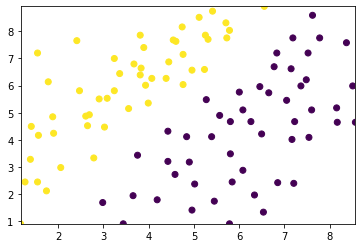

In [14]:
import matplotlib.pyplot as plt

x1s: List[float] = [x[0] for x in xs]
x2s: List[float] = [x[1] for x in xs]

plt.scatter(x1s, x2s, c=ys)
plt.axis([min(x1s), max(x1s), min(x2s), max(x2s)]);

Για να μπορέσουμε να χρησιμοποιήσουμε το αλγεβρικό τρικ που μας δίνει το γινόμενο $βx$ πρέπει να προσθέσουμε μια μονάδα στην αρχή κάθε διανύσματος εισόδου:

In [15]:
for x in xs:
    x.insert(0, 1)

xs[:5] # για να δούμε τα πέντε πρώτα διανύσματα


[[1, 2.6487, 4.5192],
 [1, 1.5438, 2.4443],
 [1, 1.899, 4.2409],
 [1, 2.4711, 5.8097],
 [1, 3.359, 6.4423]]

Έχουμε πλέον ό,τι χρειαζόμαστε για να προσαρμόσουμε τον ταξινομητή μας στα διαθέσιμα δεδομένα:

In [16]:
import random

beta: List[float] = [random.random() for _ in range(3)]

print(f'Starting with "beta": {beta}')

epochs: int = 5000
learning_rate: float = 0.01

for epoch in range(epochs):
    # Calculate the "predictions" (squishified dot product of `beta` and `x`) based on our current `beta` vector
    ys_pred: List[float] = [squash(beta, x) for x in xs]

    # Calculate and print the error
    if epoch % 1000 == True:
        loss: float = error(ys, ys_pred)
        print(f'Epoch {epoch} --> loss: {loss}')

    # Calculate the gradient
    grad: List[float] = [0 for _ in range(len(beta))]
    for x, y in zip(xs, ys):
        err: float = squash(beta, x) - y
        for i, x_i in enumerate(x):
            grad[i] += (err * x_i)
    grad = [1 / len(x) * g_i for g_i in grad]

    # Take a small step in the direction of greatest decrease
    beta = [b + (gb * -learning_rate) for b, gb in zip(beta, grad)]

print(f'Best estimate for "beta": {beta}')

Starting with "beta": [0.21362017232034236, 0.502500807405434, 0.5152479409321926]
Epoch 1 --> loss: 1.5144533135046396
Epoch 1001 --> loss: 0.017735607157787155
Epoch 2001 --> loss: 0.010707148855107469
Epoch 3001 --> loss: 0.007833918717759934
Epoch 4001 --> loss: 0.0062383098744860374
Best estimate for "beta": [5.4617660635680565, -6.747838343538667, 4.948921524821614]


Για να εκτιμήσουμε την απόδοση του ταξινομήτη μας θα τυπώσουμε τα γνωστά στατιστικά που συγκροτούν τον πίνακα σύγχυσης καθώς και τη συνολική ορθότητα.

Σημειώστε ότι τώρα το να θέσουμε ένα κατώφλι $\geq 0,5$ για την απόφασή μας είναι δόκιμο καθώς η έξοδος του ταξινομητή μας είναι μια συνάρτηση πυκνότητας πιθανότητας.

In [17]:
total: int = len(ys)
thresh: float = 0.5
true_positives: int = 0
true_negatives: int = 0
false_positives: int = 0
false_negatives: int = 0
for i, x in enumerate(xs):
    y: int = ys[i]
    pred: float = squash(beta, x)
    y_pred: int = 1
    if pred < thresh:
        y_pred = 0
    if y == 1 and y_pred == 1:
        true_positives += 1
    elif y == 0 and y_pred == 0:
        true_negatives += 1
    elif y == 1 and y_pred == 0:
        false_negatives += 1
    elif y == 0 and y_pred == 1:
        false_positives += 1

print(f'True Positives: {true_positives}')
print(f'True Negatives: {true_negatives}')
print(f'False Positives: {false_positives}')
print(f'False Negatives: {false_negatives}')
print(f'Accuracy: {(true_positives + true_negatives) / total}')
print(f'Error rate: {(false_positives + false_negatives) / total}')

True Positives: 50
True Negatives: 50
False Positives: 0
False Negatives: 0
Accuracy: 1.0
Error rate: 0.0


Τέλος, τυπώνουμε την ευθεία διαχωρισμού:

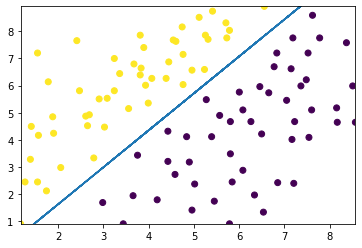

In [18]:
x1s: List[float] = [x[1] for x in xs]
x2s: List[float] = [x[2] for x in xs]
plt.scatter(x1s, x2s, c=ys)
plt.axis([min(x1s), max(x1s), min(x2s), max(x2s)]);

m: float = -(beta[1] / beta[2])
b: float = -(beta[0] / beta[2])

x2s: List[float] = [m * x[1] + b for x in xs]

plt.plot(x1s, x2s, '--');

## Λογιστική παλινδρόμηση του scikit με πολλές κατηγορίες

### Loading the Data (Digits Dataset)
The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below will load the digits dataset.

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()

Now that you have the dataset loaded you can use the commands below

In [20]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


to see that there are 1797 images and 1797 labels in the dataset

### Showing the Images and the Labels (Digits Dataset)
This section is really just to show what the images and labels look like. It usually helps to visualize your data to see what you are working with.

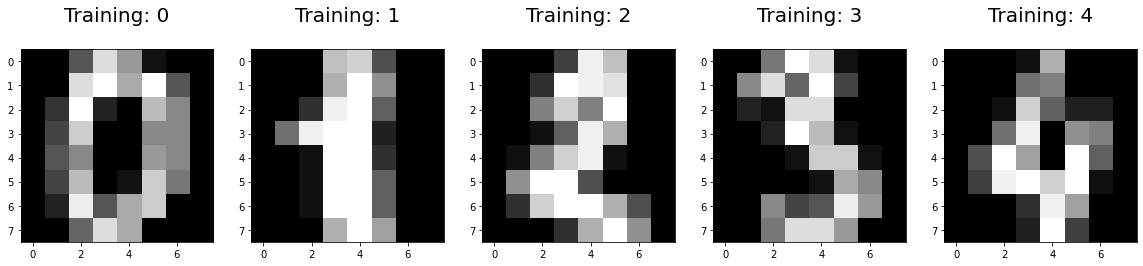

In [21]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

### Splitting Data into Training and Test Sets (Digits Dataset)

We make training and test sets to make sure that after we train our classification algorithm, it is able to generalize well to new data.

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

### Train a Logistic Regression classifier and make predictions

[Documentation απο το scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

In [23]:
# Step 1. Import the model you want to use
from sklearn.linear_model import LogisticRegression
# Step 2. Make an instance of the Model
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(solver='saga', max_iter=500)
# Step 3. Training the model on the data, storing the information learned from the data
# Model is learning the relationship between digits (x_train) and labels (y_train)
logisticRegr.fit(x_train, y_train)
# Step 4. Predict labels for new data (new images)
# Uses the information the model learned during the model training process
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))
#Predict for Multiple Observations (images) at Once
logisticRegr.predict(x_test[0:10])
#Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Measuring Model Performance (Digits Dataset)



#### Accuracy

To see how the model performs on the new data (test set) we will use the accuracy metric. 
Accuracy is defined as: 
(fraction of correct predictions): correct predictions / total number of data points

In [24]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9577777777777777


#### Confusion Matrix 

A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known.  

Text only version:

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 42  2  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  1  0  0  1 45]]


Using Seaborn: 

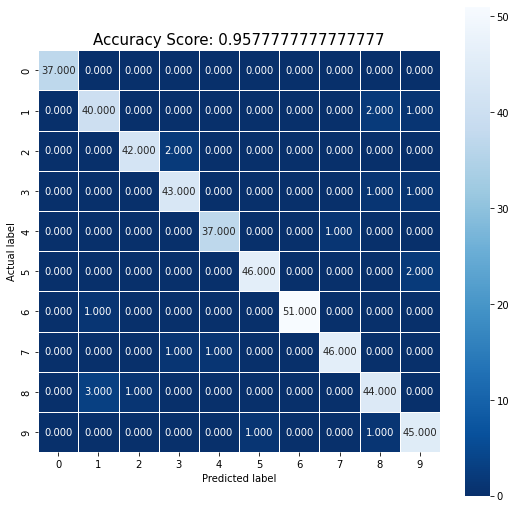

In [26]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Άσκηση: kNN from scratch

Χρησιμοποιώντας το υλικό αυτό του notebook μπορείτε να φτιάξετε έναν ταξινομητή kNN from scratch και να τον αξιολογήσετε στο toy data set ή στο Wisconsin Breast Cancer ή στο Iris;

In [27]:
#@title
import numpy as np
import operator

# function to calculate euclidean distance
def euc_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class myKNearestNeighbors():
    
    def __init__(self, K):
        self.K = K

    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train

    def predict(self, X_test):
        
        # list to store all our predictions
        predictions = []
        
        # loop over all observations
        for i in range(len(X_test)):            
            
            # calculate the distance between the test point and all other points in the training set
            dist = np.array([euc_dist(X_test[i], x_t) for x_t in self.X_train])
            
            # sort the distances and return the indices of K neighbors
            dist_sorted = dist.argsort()[:self.K]
            
            # get the neighbors
            neigh_count = {}

            # for each neighbor find the class
            for idx in dist_sorted:
                if self.Y_train[idx] in neigh_count:
                    neigh_count[self.Y_train[idx]] += 1
                else:
                    neigh_count[self.Y_train[idx]] = 1
            
            # get the most common class label 
            sorted_neigh_count = sorted(neigh_count.items(), key=operator.itemgetter(1), reverse=True)
            
            predictions.append(sorted_neigh_count[0][0])
        return predictions


import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


iris = load_iris()
data = iris.data    
target = iris.target

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=5656)

clf = myKNearestNeighbors(K=3)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.9666666666666667
